In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
from sklearn import datasets
%matplotlib inline

In [3]:
from IPython.core.display import display, HTML
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.float_format',lambda x: '%.3f' % x)
plt.rcParams['figure.figsize'] = 10,10

In [35]:
import missingno as msno
import pandas_profiling

http://mmp.opr.princeton.edu/


In [104]:
CSV_PATH = os.path.join('data', 'immigration', 'mig161.csv')
mig_df = pd.read_csv(CSV_PATH, encoding='latin1', na_values=[8888, 9999])

C:\Users\mattt\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,42,53,54,55,56,57,58,59,288,289,290,291,294,295,297,298,299,300,303,304,307,308,309,310,313,314,317,318,319,320,323,324,327,328,329,330,333,334,337,338,339,340,343,344,347,348,349,350,353,354,357,358,359,360,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,433,434,435,436,439,440,441,442,447,450,451,453,454,455,456,464,465,466,467,468,469,470,471,472,473,474,475,476,478,479,480,500,501,502,503,507,508,509) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [105]:
mig_df.head()

country  commun  surveypl  surveyyr  hhnum  weight  sex   yrborn    age  \
0        1       1         1      1987      3   3.900    1 1942.000 45.000   
1        1       1         1      1987      9   3.900    1 1933.000 54.000   
2        1       1         1      1987     12   3.900    1 1943.000 44.000   
3        1       1         1      1987     14   3.900    1 1938.000 49.000   
4        1       1         1      1987     16   3.900    1 1928.000 59.000   

   placebrn  statebrn  marstat  edyrs     occ   hhincome ldowage   @by height  \
0     0.000    11.000    2.000  0.000 529.000        NaN           nan          
1     0.000    11.000    2.000  0.000 410.000        NaN           nan          
2     0.000    11.000    2.000  4.000 549.000        NaN           nan          
3       nan    11.000    2.000  3.000 522.000 250000.000         5.000          
4     0.000    11.000    2.000  3.000 522.000 200000.000         5.000          

  kgs smokes smoked smokeage health healthly healthnw hyperten sugar heart  \
0                                                                            
1                                                                            
2                                                                            
3                                                                            
4                                                                            

  brain lung nerves cancer    usyr1 usmar1  usdur1  usdoc1  usplace1  \
0                          1977.000         12.000     nan  7320.000   
1                          1952.000         12.000   2.000       nan   
2                          1962.000          2.000   2.000  8735.000   
3                          1972.000         12.000   8.000  1600.000   
4                          1958.000         12.000   2.000  7360.000   

   usstate1  usocc1  uswage1  usby1    usyrl usmarl  usdurl  usdocl  usplacel  \
0       105 529.000      nan    nan 1977.000         12.000     nan  7320.000   
1       103 410.000    0.300  1.000 1954.000          3.000   8.000       nan   
2       105 410.000    1.000  1.000 1962.000          2.000   2.000  8735.000   
3       114 810.000    3.000  1.000 1973.000          6.000   8.000  1600.000   
4       105 410.000      nan    nan 1966.000         12.000   8.000  4480.000   

   usstatel  usoccl  uswagel  usbyl  uscurtrp  ustrips  usexp ushealth  \
0       105 529.000      nan    nan         2    1.000 12.000            
1       105 410.000    0.370  1.000         2    2.000 15.000            
2       105 410.000    1.000  1.000         2    1.000  2.000            
3       114 810.000    3.000  1.000         2    2.000 18.000            
4       105 410.000      nan    nan         2    2.000 24.000            

  mxhealth legyrapp legyrrec legspon cityrapp cityrrec dacaapp dacarec  \
0                        NaN                                             
1                        NaN                                             
2                        NaN                                             
3                        NaN                                             
4                        NaN                                             

    crsyr1  crspl1  crsst1  crshow1  crscoy1  crscst1  crspay1  crsdep1  \
0 1977.000     nan     nan      nan      nan      nan      nan      nan   
1 1954.000     nan     nan      nan      nan      nan      nan      nan   
2      nan     nan     nan      nan      nan      nan      nan      nan   
3 1972.000   4.000   2.000    1.000    1.000      nan      nan    1.000   
4 1966.000     nan   2.000      nan      nan      nan      nan    0.000   

   crsyes1   crsyr2  crspl2  crsst2  crshow2  crscoy2  crscst2  crspay2  \
0    1.000      nan     nan     nan      nan      nan      nan      nan   
1    1.000      nan     nan     nan      nan      nan      nan      nan   
2      nan      nan     nan     nan      nan      nan      nan      nan   
3    1.000 1973.0

In [106]:
mig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Columns: 510 entries, country to hlthpmt4
dtypes: float64(327), int64(9), object(174)
memory usage: 33.3+ MB


In [107]:
mig_df.shape

(8557, 510)

In [108]:
column_list = list(mig_df.select_dtypes(include=['object']).columns.values)
len(column_list)

174

In [109]:
# convert columns with strings to 'categorical' type they have low cardinality.
def convert_to_categorical(df, cols):
    for col in cols:
        # get number of unique values
        unique_vals = len(df[col].unique())
        # calculate the ratio of unique values to total number of rows
        unique_ratio = unique_vals / len(df)
        if unique_ratio <= 0.2:
            df[col] = df[col].astype('category')
    return df

In [110]:
mig_df = convert_to_categorical(mig_df, column_list)

After converting the type of any columns with low cardinality to 'category' we see that we've shaved about 10MB from the size of the DataFrame.

In [111]:
mig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Columns: 510 entries, country to hlthpmt4
dtypes: category(174), float64(327), int64(9)
memory usage: 23.6 MB


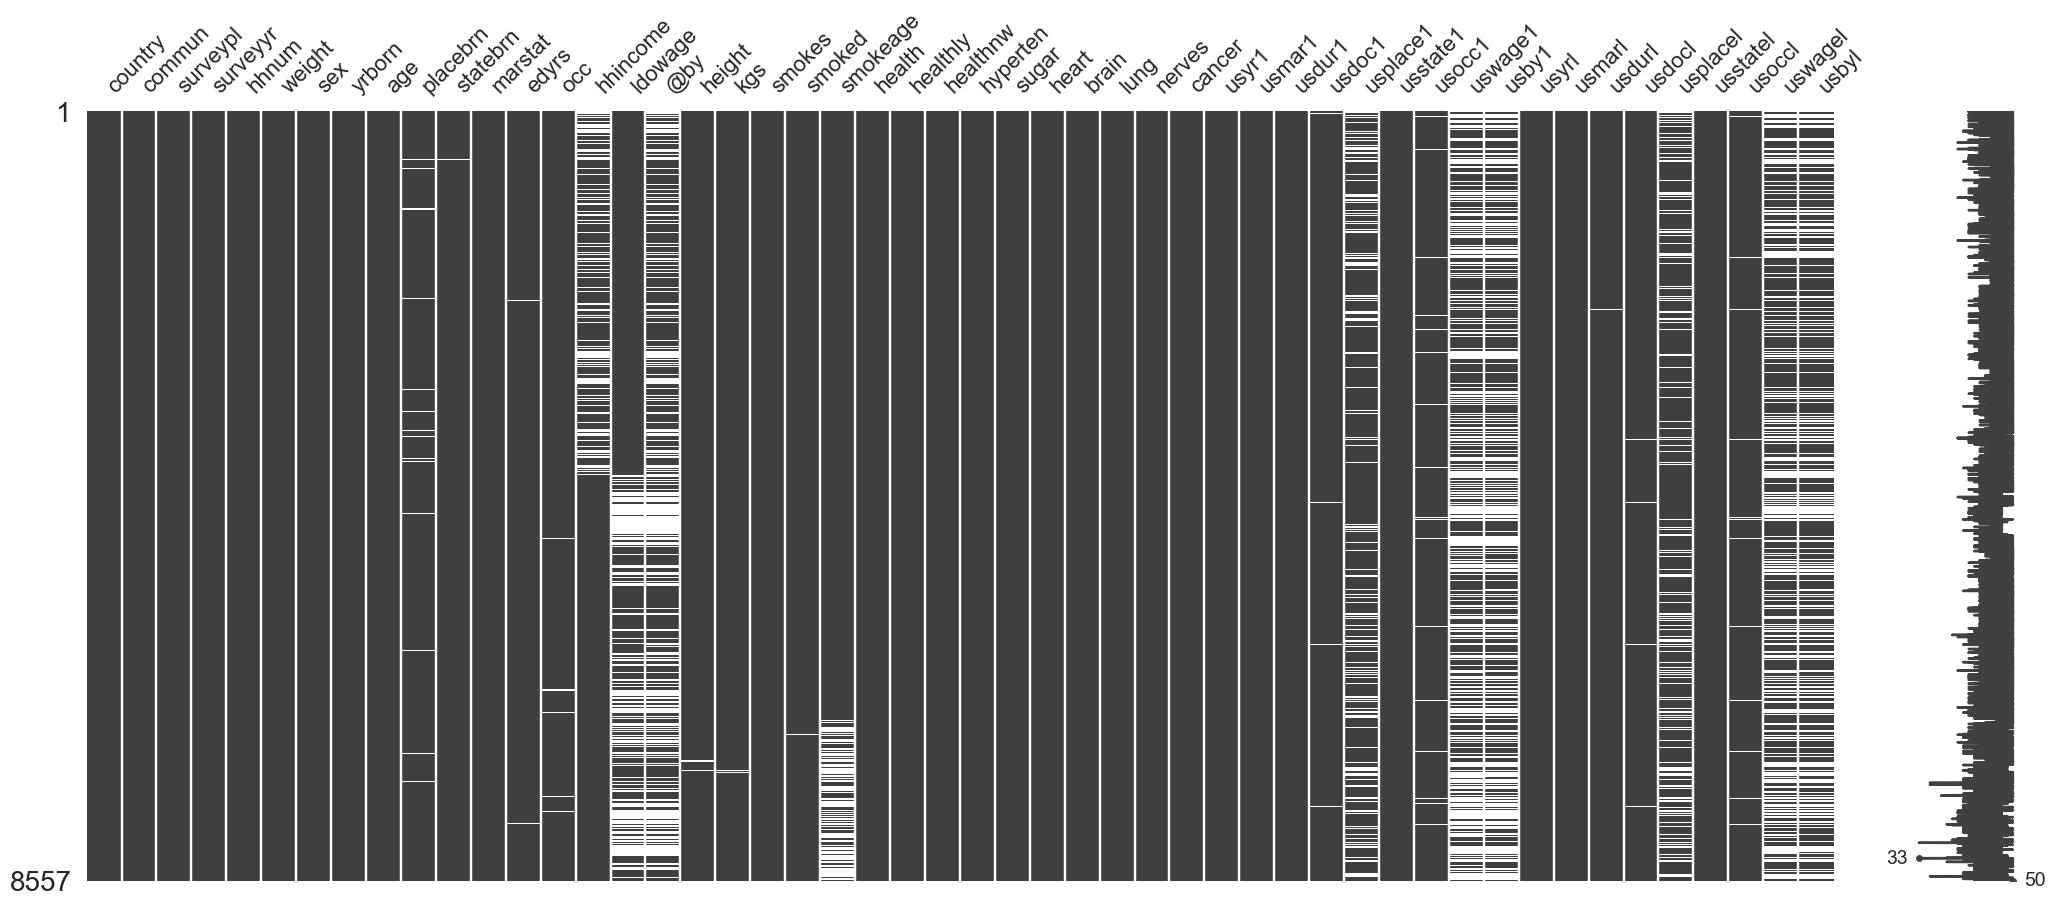

In [112]:
msno.matrix(mig_df.iloc[:,:50])

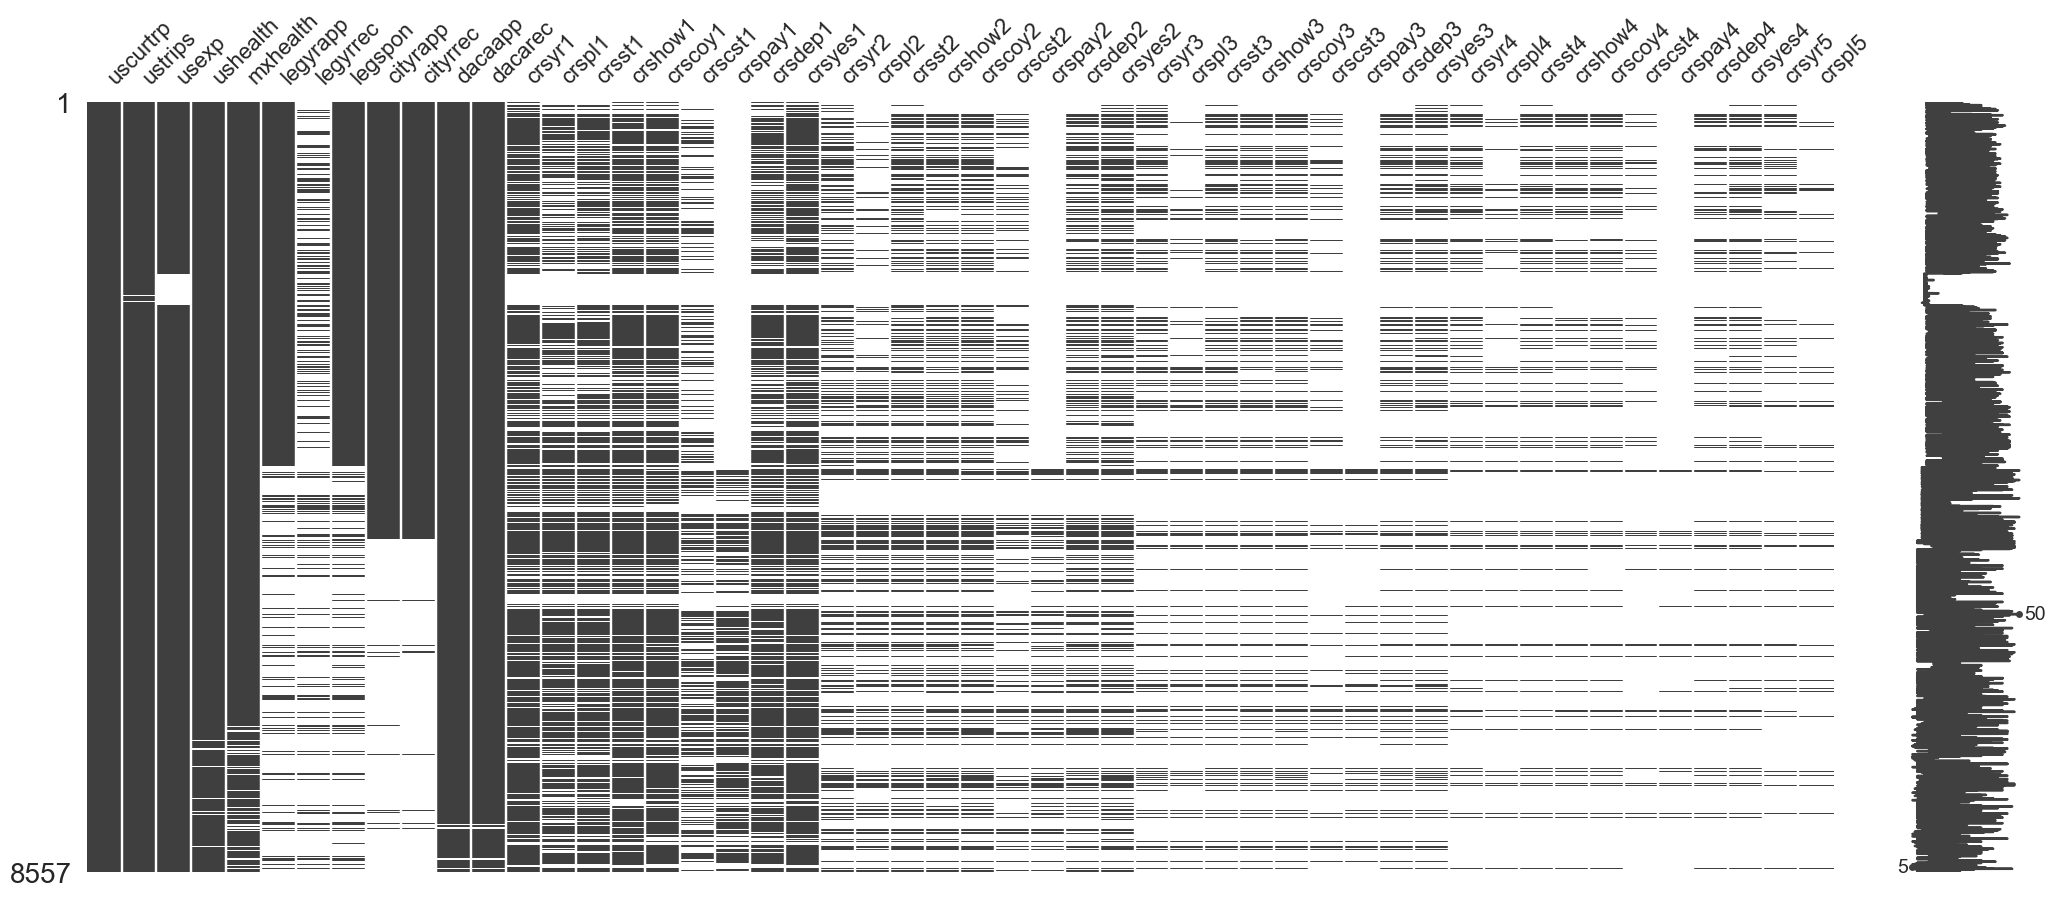

In [113]:
msno.matrix(mig_df.iloc[:,50:100])

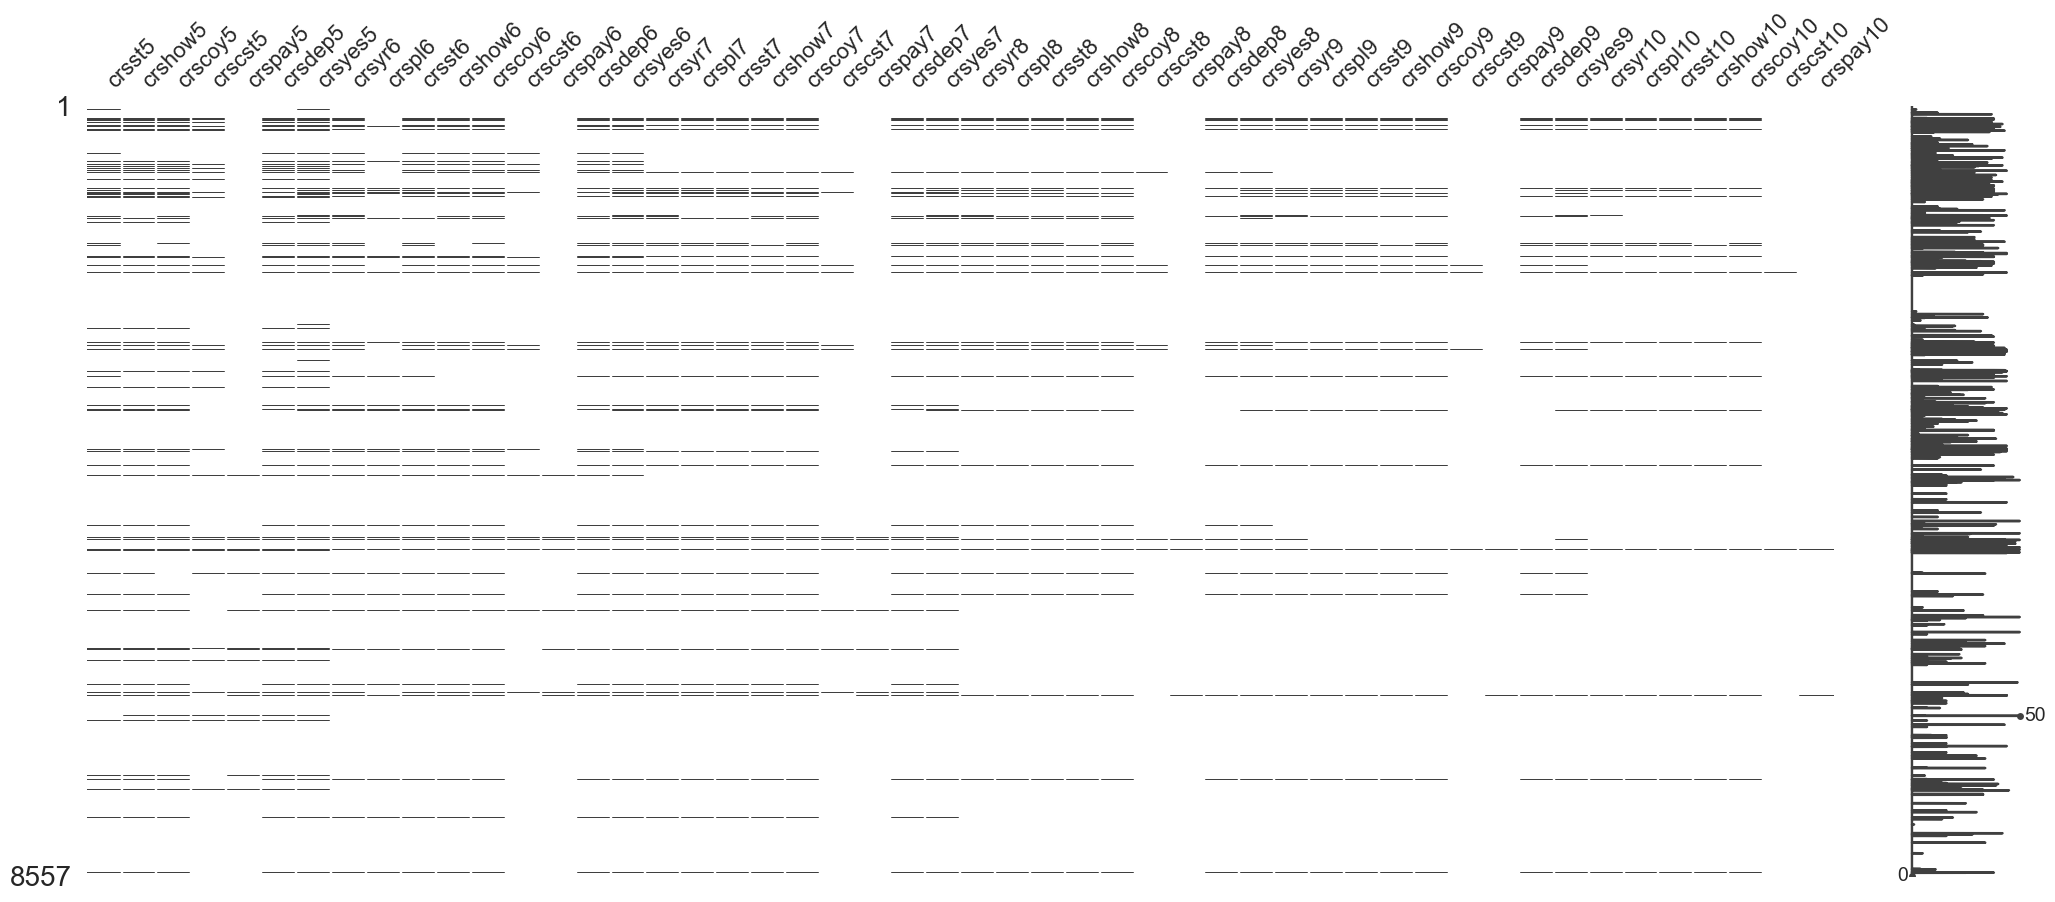

In [51]:
msno.matrix(mig_df.iloc[:,100:150])

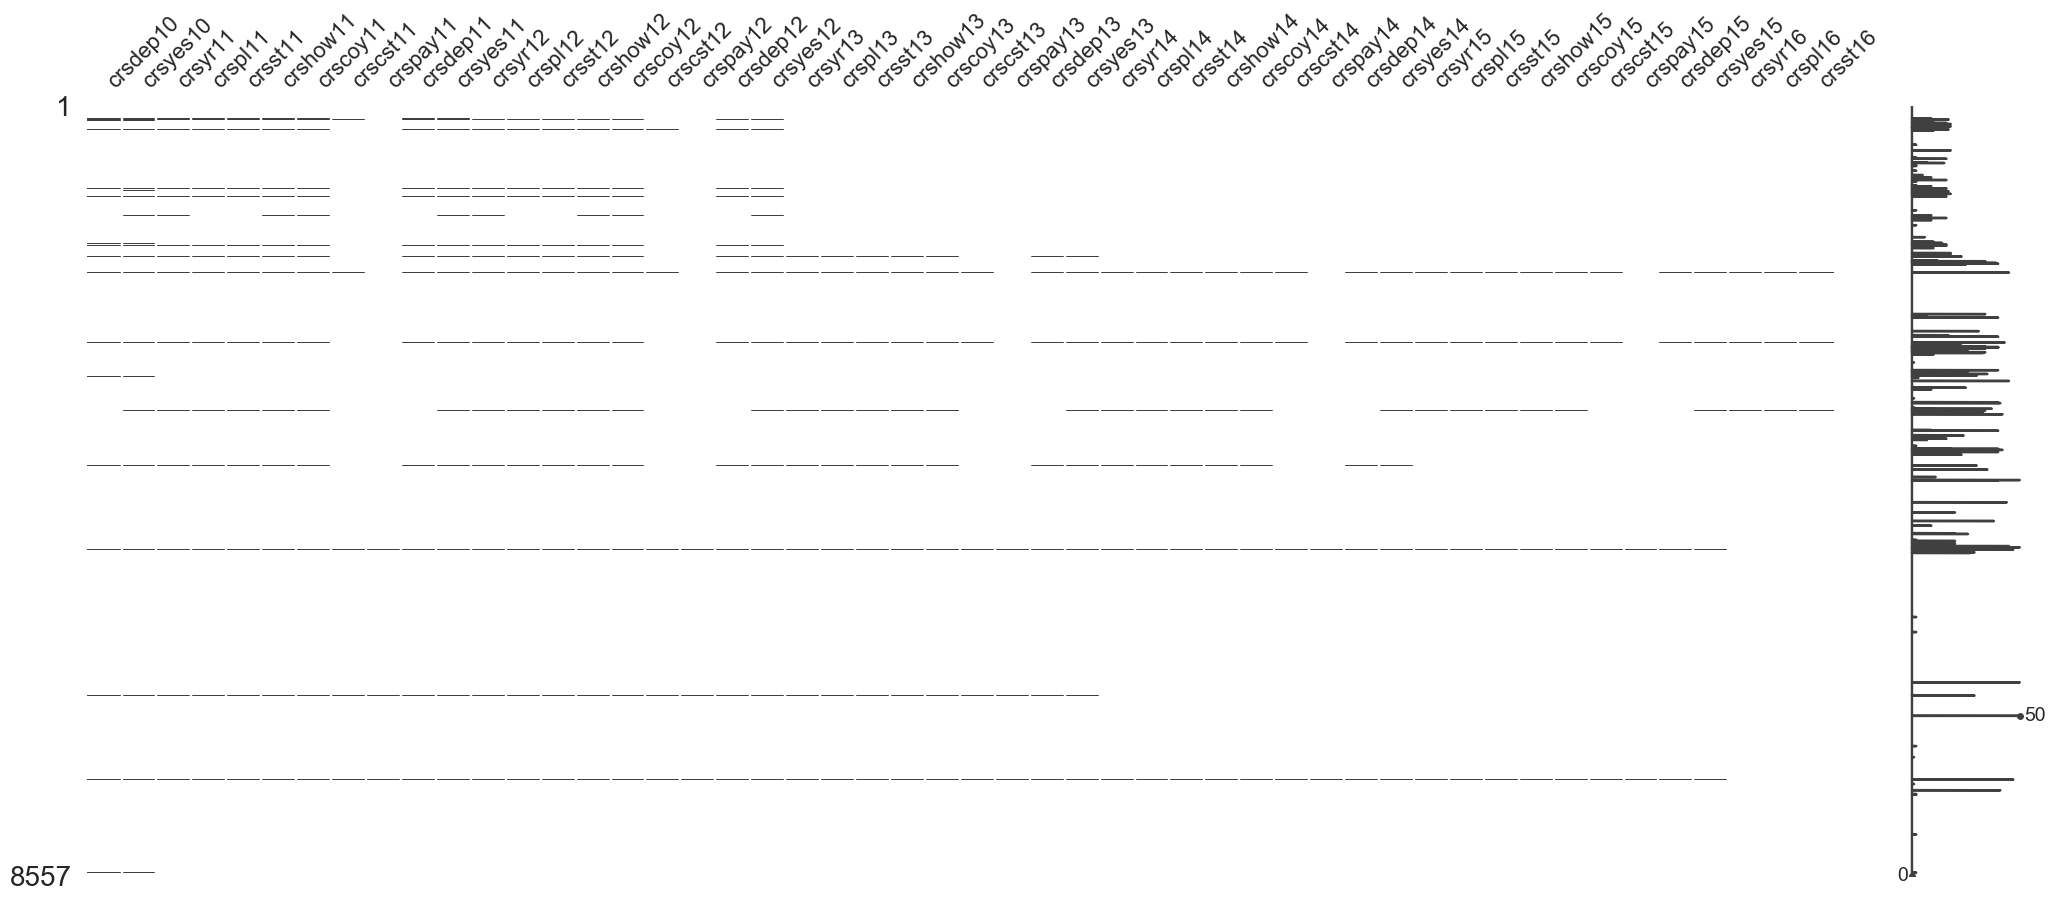

In [52]:
msno.matrix(mig_df.iloc[:,150:200])

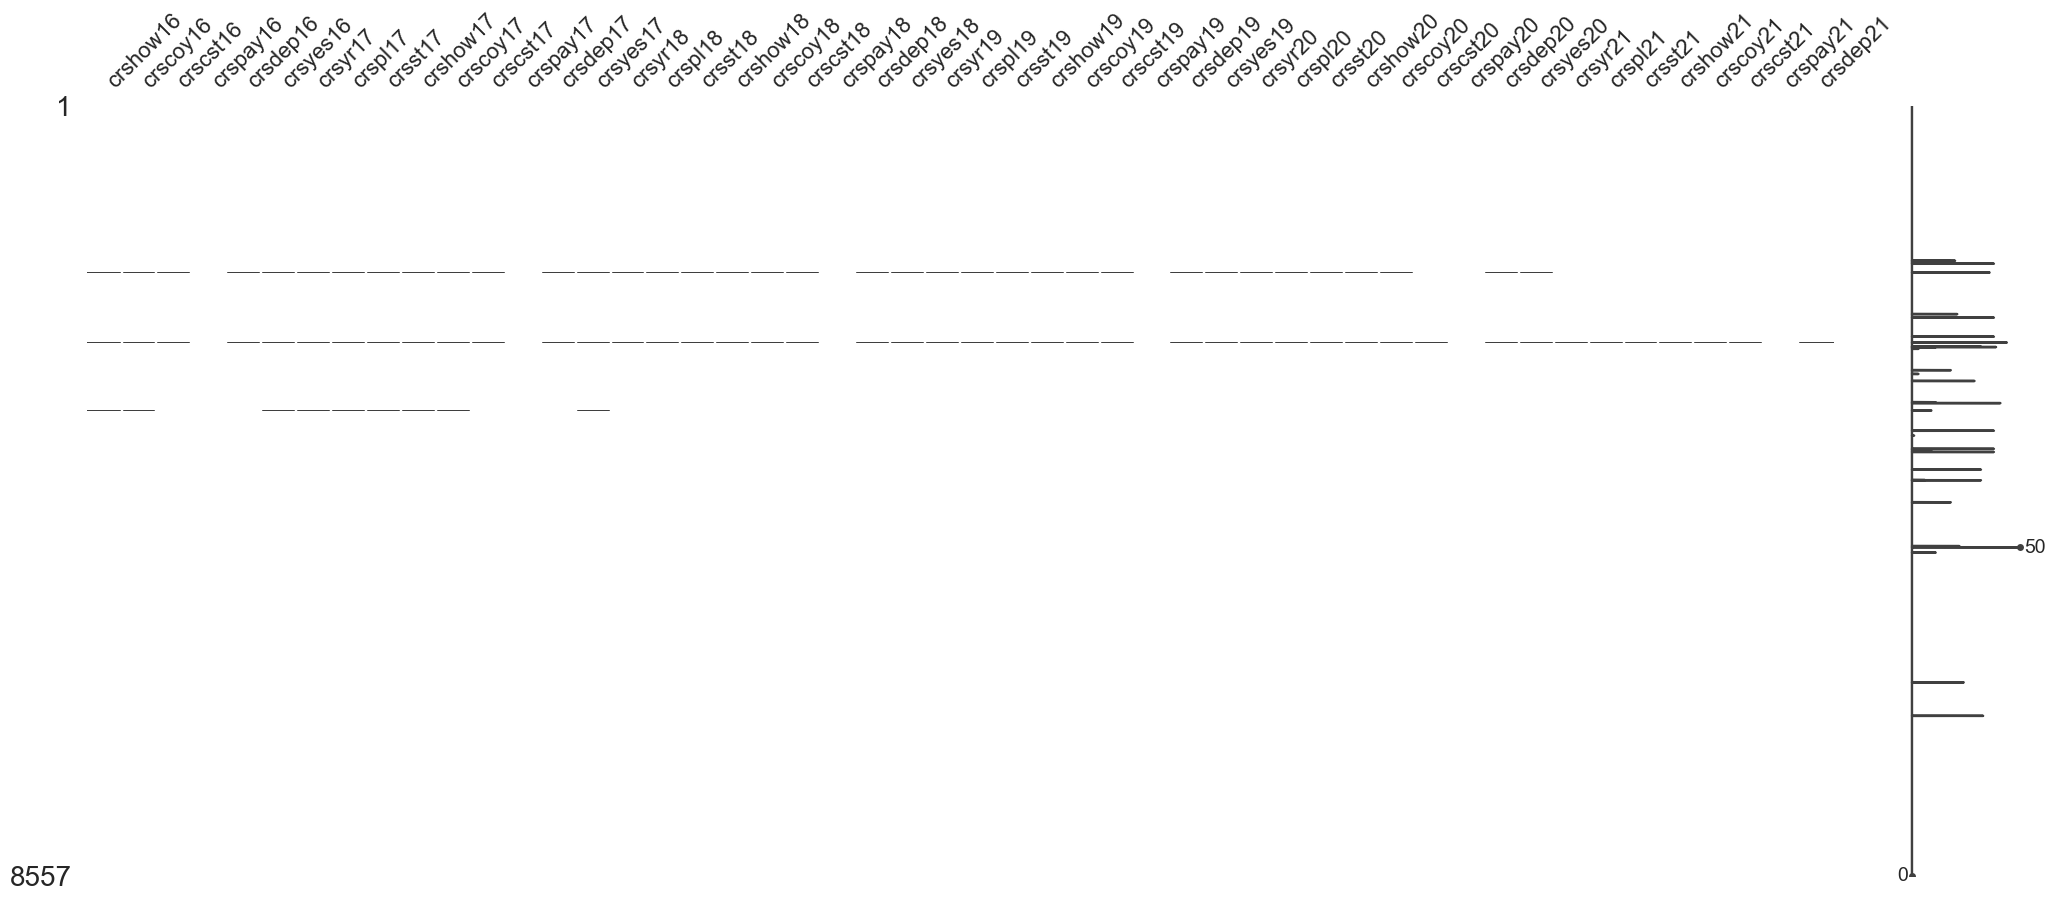

In [53]:
msno.matrix(mig_df.iloc[:,200:250])

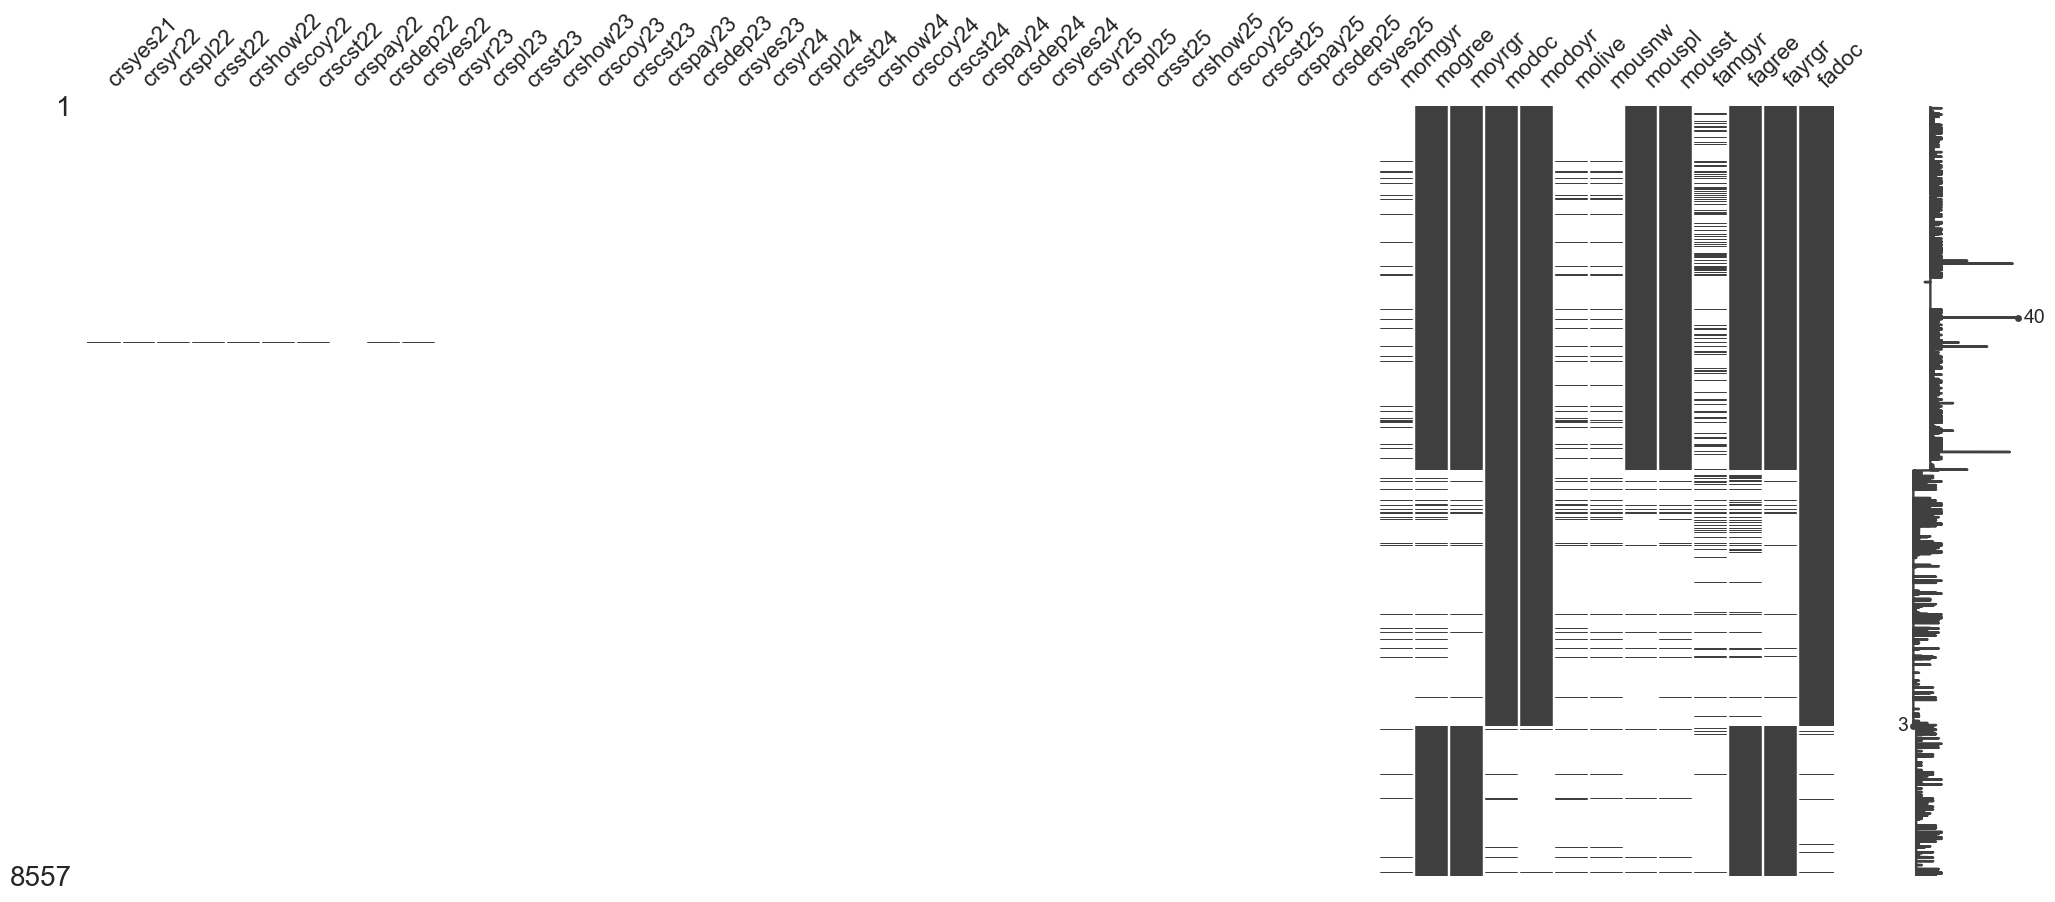

In [54]:
msno.matrix(mig_df.iloc[:,250:300])

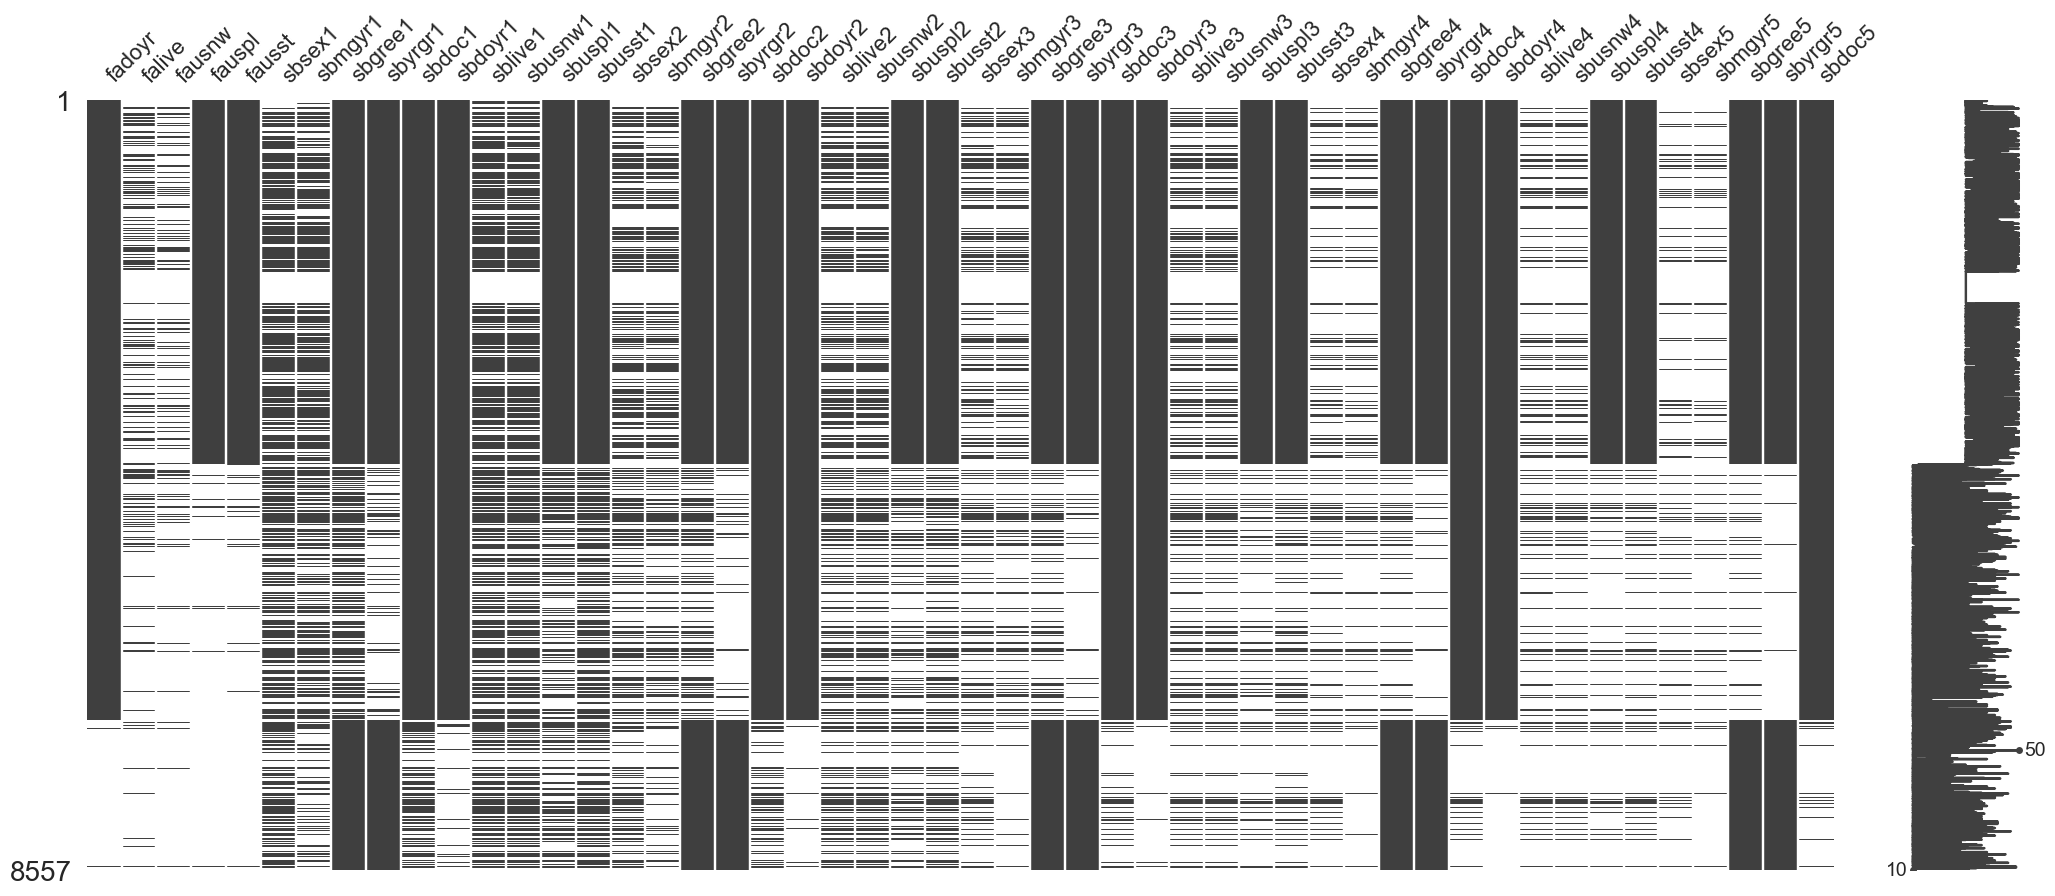

In [55]:
msno.matrix(mig_df.iloc[:,300:350])

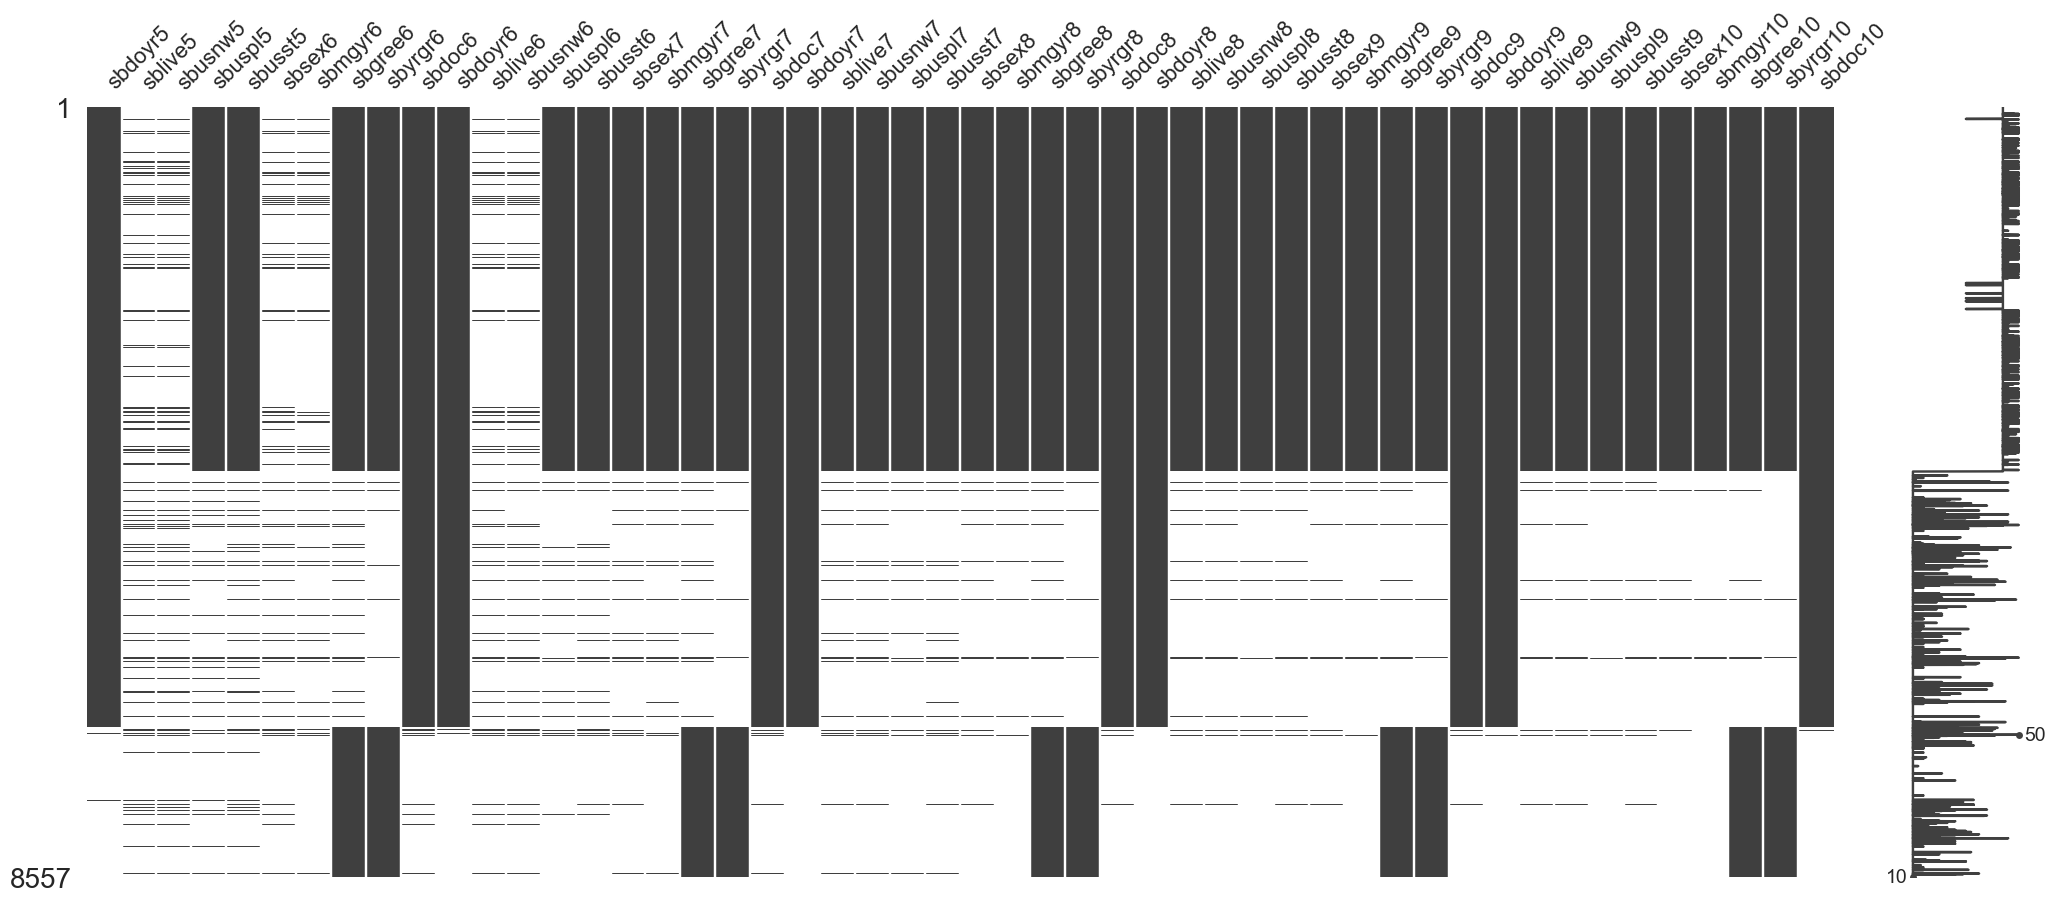

In [56]:
msno.matrix(mig_df.iloc[:,350:400])

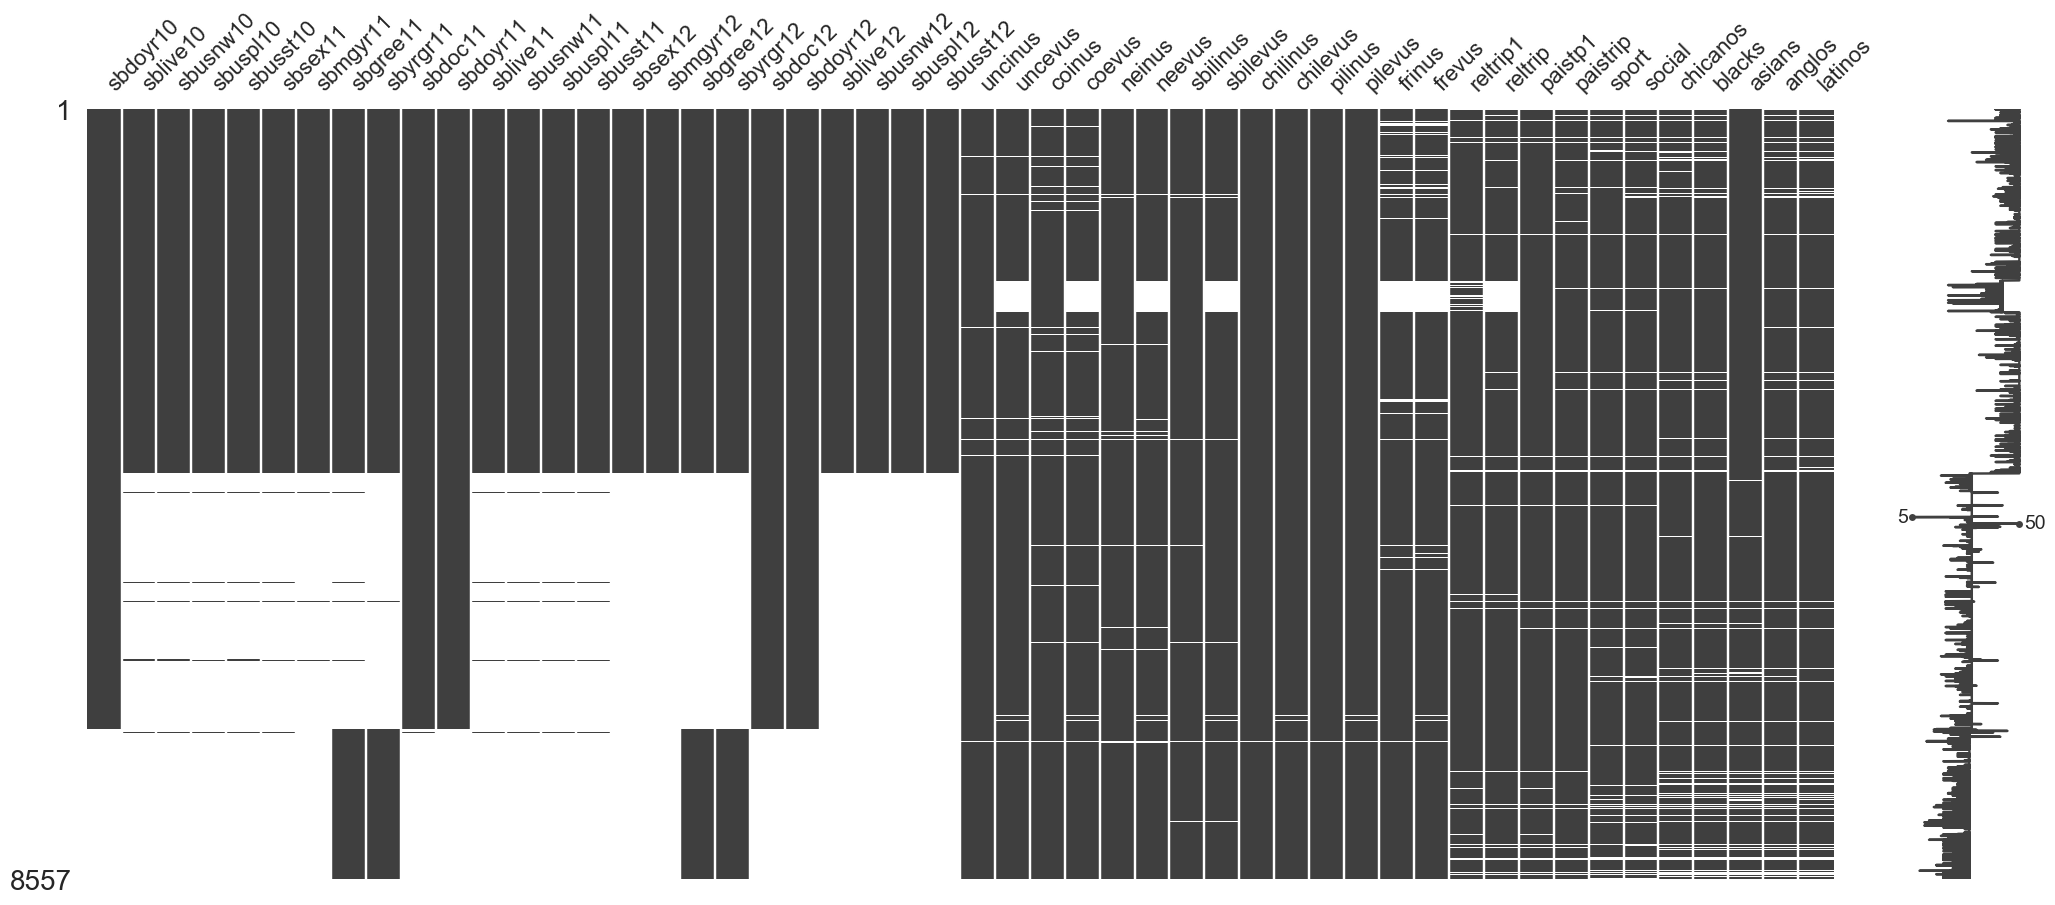

In [57]:
msno.matrix(mig_df.iloc[:,400:450])

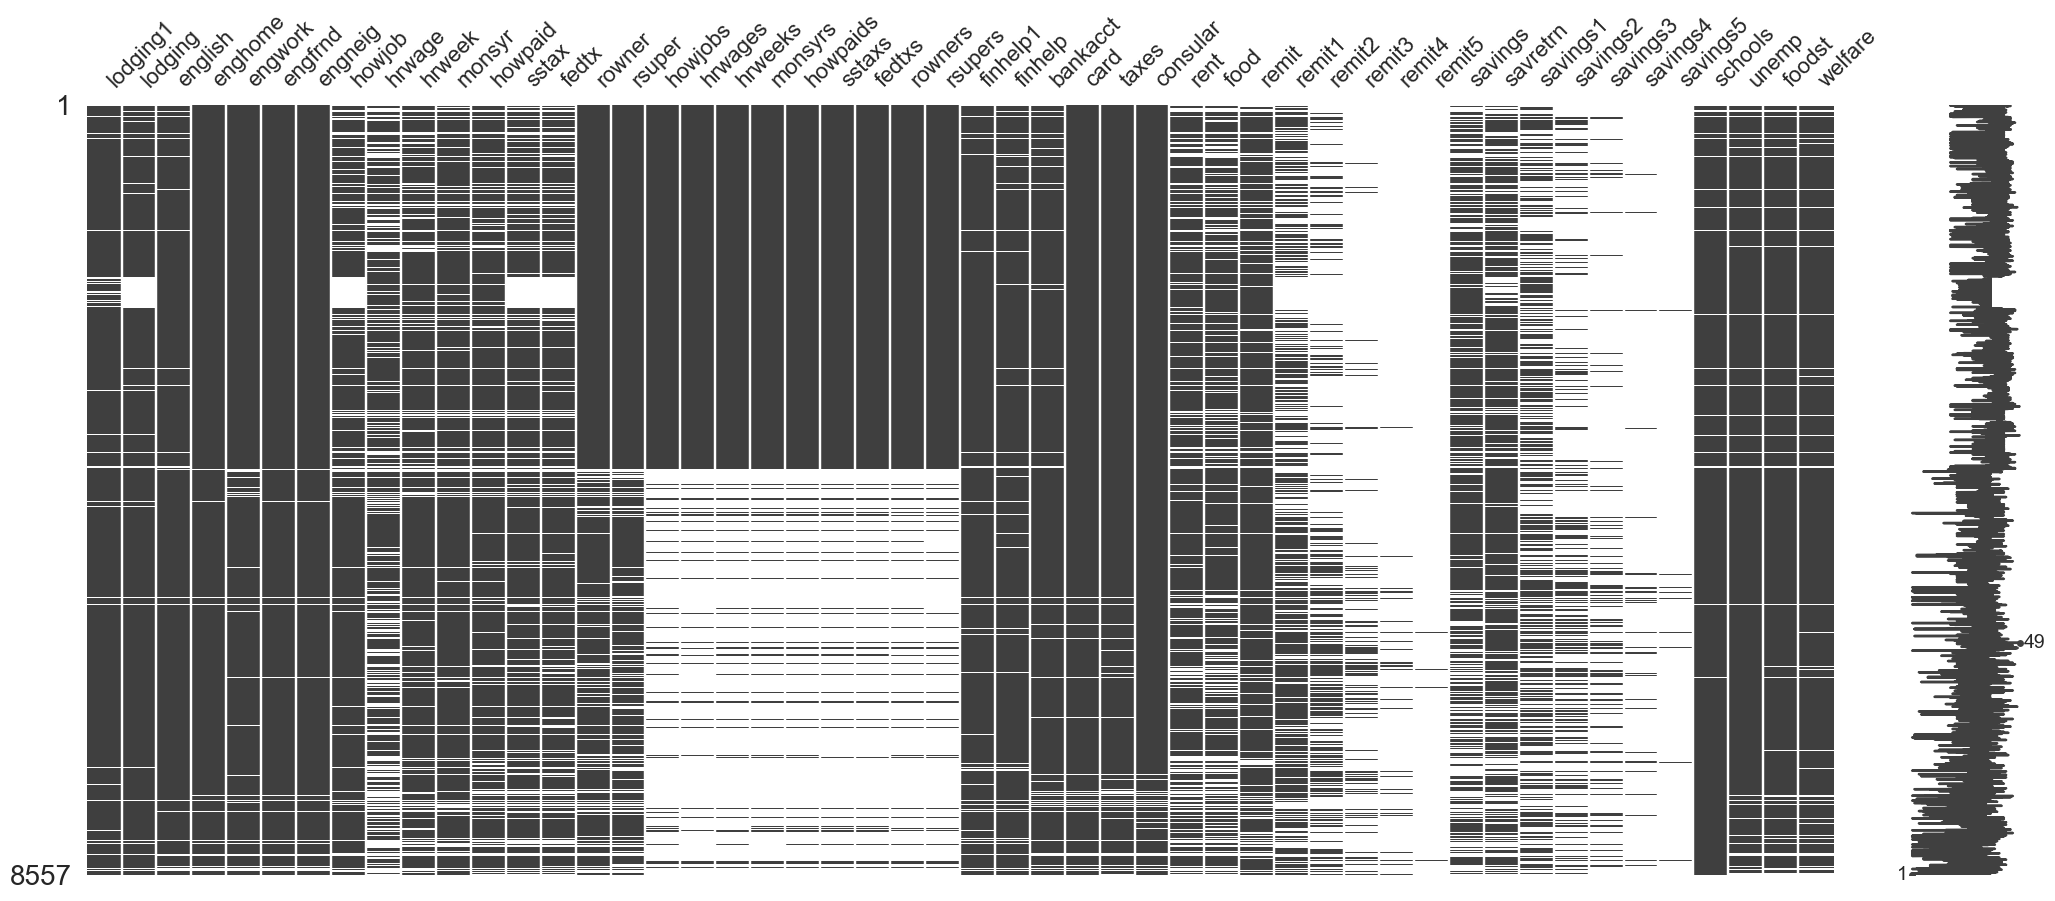

In [89]:
msno.matrix(mig_df.iloc[:,450:500])

Looking at these plots of missing data (each column corresponds to a feature in the data set, and white bars indicate missing data), we can quickly see that some features are missing the majority of values. It is possible to use **imputation** to guess at what the values should be and insert that value, but when we have nearly no data for a column, we lack the data to justify an imputation choice. The chart below shows how many features would remain at different missing value thresholds. For example, if I dropped any feature missing more than 60% of the observations, I'd have about 260 features left. If I dropped any features missing more than 40% of the data, I'd have about 180 features left. I'll start by dropping any columns with more than 60% of data missing. 

In [129]:
tmp = mig_df.isnull().sum()
tmp.sort_values(inplace=True)
tmp = tmp.divide(mig_df.shape[0])*100
tmp = tmp.reset_index(drop=True)

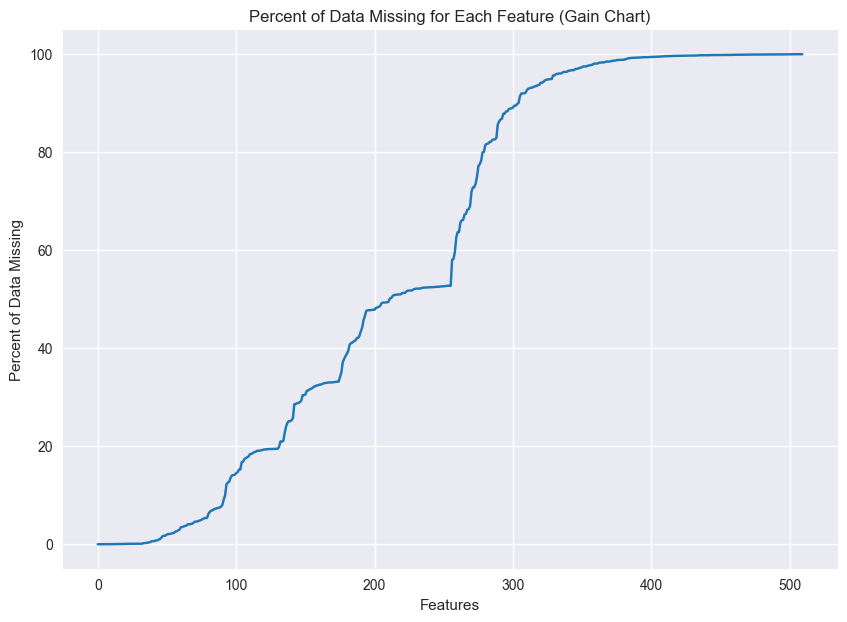

In [131]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(tmp)
    ax.set_title('Percent of Data Missing for Each Feature (Gain Chart)')
    ax.set_xlabel('Features')
    ax.set_ylabel('Percent of Data Missing')

In [132]:
mig_df.shape

(8557, 510)

In [135]:
mig_drop = mig_df.dropna(axis=1, thresh=int((1-0.60)*len(mig_df.index)))

In [136]:
mig_drop.shape

(8557, 259)

In [137]:
mig_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Columns: 259 entries, country to hlthpmt4
dtypes: category(173), float64(77), int64(9)
memory usage: 7.2 MB


We see that we've trimmed the data down to about 25% of the size we started with. Calculations would have been quick enough with the 33 MB we were working with before, but we would have been lugging a lot of unnecessary data through the computations.

In [139]:
profile = pandas_profiling.ProfileReport(mig_drop.select_dtypes(exclude=['object']))
profile

In [140]:
rejected_variables = profile.get_rejected_variables(threshold=0.9)
rejected_variables

['coevus', 'crsst1', 'crsyr1', 'frevus', 'hhnum', 'neevus', 'surveyyr']

Looking through the profile and the missing data graphs, we see that a lot of variables have a lot of missing data. We also see that a lot of variables have very high/perfect correlation. I'm not sure how the profiler picks which of the correlated variables to keep, but it looks like it's rejecting some potentially interesting variables (eg dropped 'unemp' because of perfect correlation with CRSCST21 (cost of coyote on 21st crossing)). 